In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Leads.csv")

In [4]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [5]:
#df.iloc[1]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#round(df.isnull().sum()/len(df) *100,2)

In [8]:
#df.columns

In [9]:
cols =["Specialization","How did you hear about X Education","Lead Profile","City"]

In [10]:
#Replacing all the values == "Select" as np.nan in colums with values "Selcet"
for col in cols:                                 
    df.loc[df[col]=="Select",[col]]=np.nan    
 

In [11]:
#round(df.isnull().sum()/len(df) *100,2)

In [12]:
round(df.isnull().sum()/len(df) *100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
drop_cols=["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index",
          "Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score","Tags"]

In [14]:
df[drop_cols].head(2)

,How did you hear about X Education,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Tags
0,NaN,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,Interested in other courses
1,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,Ringing


In [15]:
df_sel = df.drop(drop_cols,axis=1)

In [16]:
len(df.columns)-len(df_sel.columns)

8

In [17]:
round(df_sel.isnull().sum()/len(df_sel)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [18]:
#Missing value imutataion in columns with more than 26% null values

In [19]:
# Imputing Unknown for missing value in Country Column
df_sel.loc[df_sel['Country'].isnull(),['Country']]="unknown"

In [20]:
# Imputing Other for missing value in Specialization Column
df_sel.loc[df_sel['Specialization'].isnull(),['Specialization']]="Other"                

In [21]:
# Imputing Other for missing value in Column What is your current occupation
df_sel.loc[df_sel["What is your current occupation"].isnull(),["What is your current occupation"]]="Other"

In [22]:
#Imputing Unknown for missing value in Column What matters most to you in choosing a course
df_sel.loc[df_sel["What matters most to you in choosing a course"].isnull(),
           ["What matters most to you in choosing a course"]]="Unknown"

In [23]:
# Imputing Other City for missing value in City Coulumn
df_sel.loc[df_sel["City"].isnull(),["City"]]="Other Cities"

In [24]:
df_sel.isnull().sum()/len(df_sel)*100 # Very less missing value left per column at max 1.5 % hence dropping them

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [25]:
df_final=df_sel.dropna()

In [26]:
df_final.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [27]:
len(df_final)

9074

In [28]:
drop_cols1 =["Do Not Call","Magazine","Newspaper Article","Digital Advertisement","Through Recommendations",
            "Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content",
            "I agree to pay the amount through cheque","Prospect ID","Lead Number","Newspaper","Search"]

In [29]:
df_final1 =df_final.drop(drop_cols1,axis=1)

In [30]:
df_final1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,X Education Forums,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,unknown,Other,Unemployed,Better Career Prospects,No,Other Cities,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,Better Career Prospects,No,Other Cities,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,Better Career Prospects,No,Mumbai,No,Modified


In [31]:
len(df_final1)

9074

In [32]:
df_final1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [33]:
df_final1 = df_final1.dropna()

In [34]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074 non-null object
X Education Forums                               9074

In [35]:
df_final1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


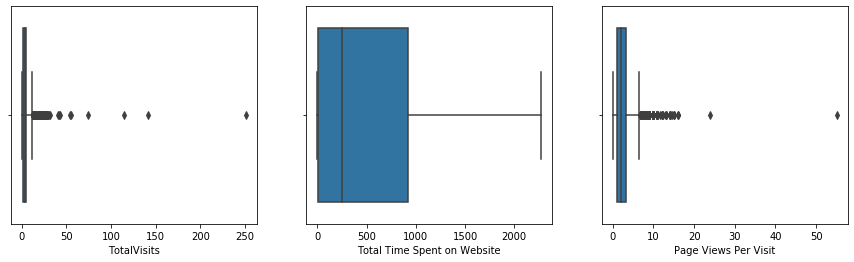

In [36]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
for col,ax in zip(["TotalVisits","Total Time Spent on Website","Page Views Per Visit"],axes):
    sns.boxplot(df_final1[col],ax=ax)   

In [37]:
yesno = ["Do Not Email","X Education Forums","A free copy of Mastering The Interview"]

In [38]:
def yesno_map(x):
    return x.map({"No":0,"Yes":1})

In [39]:
df_final1[yesno] = df_final1[yesno].apply(yesno_map)

In [40]:
df_final1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'X Education Forums',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [41]:
multi_level = ['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation',
             'What matters most to you in choosing a course','City','Last Notable Activity']

In [42]:
df_final1[multi_level][:5]

,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,unknown,Other,Unemployed,Better Career Prospects,Other Cities,Modified
1,API,Organic Search,Email Opened,India,Other,Unemployed,Better Career Prospects,Other Cities,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Other,Unemployed,Better Career Prospects,Mumbai,Modified


In [43]:
dummies = pd.get_dummies(df_final[multi_level],drop_first=True)
df_final1 = pd.concat([df_final1,dummies],axis=1)

In [44]:
len(df_final1.columns)

138

In [45]:
#Dropping the original features 

df_final1 = df_final1.drop(multi_level,axis=1)

In [46]:
len(df_final1.columns)

129

In [47]:
len(multi_level)

9

In [48]:
df_final1.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
df_final1[["TotalVisits","Total Time Spent on Website",
           "Page Views Per Visit"]].describe(percentiles=[.25,.50,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [50]:
round(df_final1.isnull().sum()/len(df_final1)*100,2)

Do Not Email                                          0.0
Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
                                                     ... 
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 129, dtype: float64

In [51]:
np.sum(df_final1.isnull().sum())

0

In [52]:
df_final1=df_final1[df_final1["Page Views Per Visit"] <np.quantile(df_final1["Page Views Per Visit"],.99)]

In [53]:
df_final1=df_final1[df_final1["Total Time Spent on Website"] <np.quantile(df_final1["Total Time Spent on Website"],.99)]

In [54]:
df_final1 = df_final1[df_final1["TotalVisits"] <np.quantile(df_final1["TotalVisits"],.99)]

In [55]:
df_final1[["TotalVisits","Total Time Spent on Website",
           "Page Views Per Visit"]].describe(percentiles=[.25,.50,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8774.000000,8774.00000,8774.000000
mean,3.083542,463.16811,2.228070
std,2.816144,526.43761,1.836259
min,0.000000,0.00000,0.000000
25%,1.000000,3.00000,1.000000
50%,3.000000,235.00000,2.000000
75%,4.000000,882.75000,3.000000
90%,7.000000,1342.00000,5.000000
95%,8.000000,1513.00000,6.000000
99%,13.000000,1730.54000,7.000000


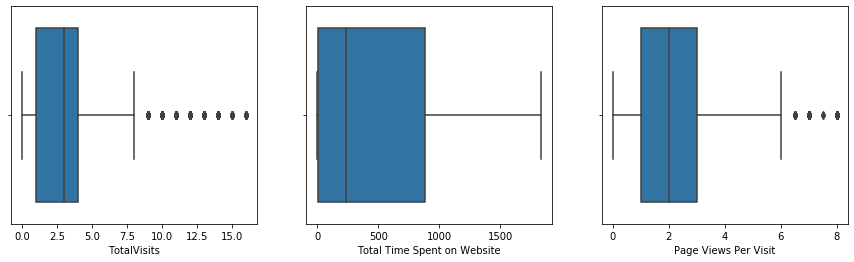

In [56]:
fig,axes = plt.subplots(1,3,figsize=(15,4)) # After dropping 1% of the outliers from right
for col,ax in zip(["TotalVisits","Total Time Spent on Website","Page Views Per Visit"],axes):
    sns.boxplot(df_final1[col],ax=ax)

In [57]:
np.sum(df_final1.isnull().sum())

0

In [58]:
df_final1.iloc[0][:46] # Cursory look at all the columns

Do Not Email                                  0.0
Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent on Website                   0.0
Page Views Per Visit                          0.0
X Education Forums                            0.0
A free copy of Mastering The Interview        0.0
Lead Origin_Landing Page Submission           0.0
Lead Origin_Lead Add Form                     0.0
Lead Origin_Lead Import                       0.0
Lead Source_Direct Traffic                    0.0
Lead Source_Facebook                          0.0
Lead Source_Google                            0.0
Lead Source_Live Chat                         0.0
Lead Source_NC_EDM                            0.0
Lead Source_Olark Chat                        1.0
Lead Source_Organic Search                    0.0
Lead Source_Pay per Click Ads                 0.0
Lead Source_Press_Release                     0.0
Lead Source_Reference                         0.0


In [59]:
df_final1.iloc[0][46:83] # Cursory look at all the columns

Country_Australia               0.0
Country_Bahrain                 0.0
Country_Bangladesh              0.0
Country_Belgium                 0.0
Country_Canada                  0.0
Country_China                   0.0
Country_Denmark                 0.0
Country_France                  0.0
Country_Germany                 0.0
Country_Ghana                   0.0
Country_Hong Kong               0.0
Country_India                   0.0
Country_Indonesia               0.0
Country_Italy                   0.0
Country_Kenya                   0.0
Country_Kuwait                  0.0
Country_Liberia                 0.0
Country_Malaysia                0.0
Country_Netherlands             0.0
Country_Nigeria                 0.0
Country_Oman                    0.0
Country_Philippines             0.0
Country_Qatar                   0.0
Country_Russia                  0.0
Country_Saudi Arabia            0.0
Country_Singapore               0.0
Country_South Africa            0.0
Country_Sri Lanka           

In [60]:
df_final1.iloc[0][83:109] # Cursory look at all the columns

Specialization_Business Administration                                     0.0
Specialization_E-Business                                                  0.0
Specialization_E-COMMERCE                                                  0.0
Specialization_Finance Management                                          0.0
Specialization_Healthcare Management                                       0.0
Specialization_Hospitality Management                                      0.0
Specialization_Human Resource Management                                   0.0
Specialization_IT Projects Management                                      0.0
Specialization_International Business                                      0.0
Specialization_Marketing Management                                        0.0
Specialization_Media and Advertising                                       0.0
Specialization_Operations Management                                       0.0
Specialization_Other                                

In [61]:
df_final1.iloc[0][109:] # Cursory look at all the columns

City_Other Cities                                     1.0
City_Other Cities of Maharashtra                      0.0
City_Other Metro Cities                               0.0
City_Thane & Outskirts                                0.0
City_Tier II Cities                                   0.0
Last Notable Activity_Email Bounced                   0.0
Last Notable Activity_Email Link Clicked              0.0
Last Notable Activity_Email Marked Spam               0.0
Last Notable Activity_Email Opened                    0.0
Last Notable Activity_Email Received                  0.0
Last Notable Activity_Form Submitted on Website       0.0
Last Notable Activity_Had a Phone Conversation        0.0
Last Notable Activity_Modified                        1.0
Last Notable Activity_Olark Chat Conversation         0.0
Last Notable Activity_Page Visited on Website         0.0
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable A

In [62]:
len(df_final1.columns)

129

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X =df_final1.drop("Converted",axis=1)

In [65]:
y = df_final1["Converted"]

In [66]:
y.shape

(8774,)

In [67]:
X.shape

(8774, 128)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]= scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website",
                                                                                                             "Page Views Per Visit"]])

In [72]:
X_train[:1]

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4420,0,1.767944,1.974439,3.17281,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df_final1["Converted"].sum()/len(df_final1)

0.3750854798267609

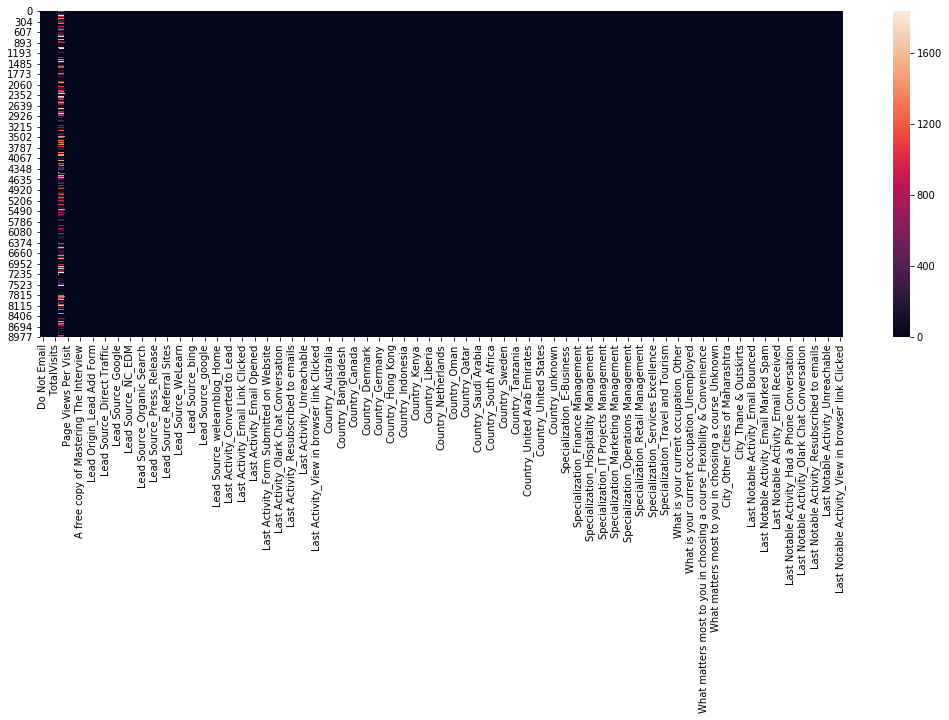

In [74]:
plt.figure(figsize=(18,6))
sns.heatmap(df_final1)

In [75]:
import statsmodels.api as sm

In [76]:
#Logistic regression model
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6022
Model Family:                Binomial   Df Model:                          118
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Apr 2020   Deviance:                          nan
Time:                        20:37:05   Pearson chi2:                 6.23e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -2.973e+15    9.1e+07  -3.27e+07      0.000   -2.97e+15   -2.97e+15
Do Not Email                                                            -6.211e+14   4.61e+06  -1.35e+08      0.000   -6.21e+14   -6.21e+14
TotalVisits                                                              3.835e+13   1.36e+06   2.83e+07      0.000    3.84e+13    3.84e+13
Total Time Spent on Website                                               1.96e+14   1.01e+06   1.94e+08      0.000    1.96e+14    1.96e+14
Page Views Per Visit                                                     4.708e+13    1.5e+06   3.14e+07      0.000    4.71e+13    4.71e+13
X Education Forums                                                        -38.8978   7.12e-07  -5.46e+07      0.000     -38.898     -38.898
A free copy of Mastering The Interview                                    1.37e+14   2.78e+06   4.92e+07      0.000    1.37e+14    1.37e+14
Lead Origin_Landing Page Submission                                     -6.344e+14    3.7e+06  -1.71e+08      0.000   -6.34e+14   -6.34e+14
Lead Origin_Lead Add Form                                               -5.259e+14   4.76e+07   -1.1e+07      0.000   -5.26e+14   -5.26e+14
Lead Origin_Lead Import                                                  1.697e+15   7.23e+07   2.35e+07      0.000     1.7e+15     1.7e+15
Lead Source_Direct Traffic                                               5.317e+15   8.28e+07   6.42e+07      0.000    5.32e+15    5.32e+15
Lead Source_Facebook                                                     2.538e+15   1.09e+08   2.34e+07      0.000    2.54e+15    2.54e+15
Lead Source_Google                                                       5.405e+15   8.28e+07   6.53e+07      0.000     5.4e+15     5.4e+15
Lead Source_Live Chat                                                    8.651e+15   9.51e+07    9.1e+07      0.000    8.65e+15    8.65e+15
Lead Source_NC_EDM                                                       1.215e+16   1.07e+08   1.14e+08      0.000    1.22e+16    1.22e+16
Lead Source_Olark Chat                                                   5.395e+15   8.24e+07   6.55e+07      0.000     5.4e+15     5.4e+15
Lead Source_Organic Search                                               5.284e+15   8.28e+07   6.38e+07      0.000    5.28e+15    5.28e+15
Lead Source_Pay per Click Ads                                            9.597e+14   1.07e+08      9e+06      0.000     9.6e+14     9.6e+14
Lead Source_Press_Release                                                3.832e+15   1.07e+08   3.58e+07      0.000    3.83e+15    3.83e+15
Lea

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE

In [80]:
rfe = RFE(logreg,15)

In [81]:
rfe = rfe.fit(X_train,y_train)

In [82]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False]

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 37),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('X Education Forums', False, 110),
 ('A free copy of Mastering The Interview', False, 72),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 51),
 ('Lead Source_Live Chat', False, 74),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 90),
 ('Lead Source_Organic Search', False, 50),
 ('Lead Source_Pay per Click Ads', False, 68),
 ('Lead Source_Press_Release', False, 91),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 93),
 ('Lead Source_blog', False, 6

In [84]:
col = X_train.columns[rfe.support_]

In [85]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_unknown', 'Specialization_Other',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Unknown',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [86]:
# Assesing model with statsmodel
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2410.2
Date:                Mon, 20 Apr 2020   Deviance:                       4820.3
Time:                        20:37:13   Pearson chi2:                 6.31e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.3726      0.126     -2.967      0.003      -0.619      -0.126
Do Not Email                                             -1.5008      0.187     -8.040      0.000      -1.867      -1.135
Total Time Spent on Website                               1.1885      0.043     27.955      0.000       1.105       1.272
Lead Origin_Landing Page Submission                      -1.0100      0.130     -7.754      0.000      -1.265      -0.755
Lead Origin_Lead Add Form                                 2.1275      0.266      7.984      0.000       1.605       2.650
Lead Source_Welingak Website                             22.7384   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Last Activity_Had a Phone Conversation                    0.8044      0.906      0.888      0.374      -0.971       2.579
Last Activity_Olark Chat Conversation                    -1.4662      0.178     -8.255      0.000      -1.814      -1.118
Last Activity_SMS Sent                                    1.3828      0.078     17.705      0.000       1.230       1.536
Country_unknown                                           1.5218      0.126     12.089      0.000       1.275       1.769
Specialization_Other                                     -0.9502      0.132     -7.173      0.000      -1.210      -0.691
What is your current occupation_Working Professional      2.4801      0.206     12.048      0.000       2.077       2.884
What matters most to you in choosing a course_Unknown    -1.1367      0.091    -12.524      0.000      -1.315      -0.959
Last Notable Activity_Had a Phone Conversation            2.6909      1.472      1.828      0.068      -0.194       5.576
Last Notable Activity_Unreachable                         2.1843      0.553      3.952      0.000       1.101       3.268
Last Notable Activity_Unsubscribed                        1.3869      0.506      2.740      0.006       0.395       2.379
=========================================================================================================================
"""

In [87]:
#getting predicted value on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:11]

4420    0.723940
284     0.174464
2310    0.087711
8311    0.024815
417     0.100604
8559    0.082856
5494    0.144515
2047    0.298778
7508    0.833545
659     0.524240
46      0.229844
dtype: float64

In [88]:
y_train_pred = y_train_pred.values.reshape(-1)

In [89]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values,"Converted_Prob":y_train_pred})
y_train_pred_final["CustID"]=y_train.index

In [90]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.723940,4420
1,0,0.174464,284
2,0,0.087711,2310
3,0,0.024815,8311
4,0,0.100604,417


In [91]:
y_train_pred_final["predicted"] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.34 else 0)

In [92]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.723940,4420,1
1,0,0.174464,284,0
2,0,0.087711,2310,0
3,0,0.024815,8311,0
4,0,0.100604,417,0


In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [94]:
confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

array([[3113,  718],
       [ 425, 1885]], dtype=int64)

In [95]:
accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.8138739618954568

In [96]:
f1_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7673519234683491

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_unknown,2.84
5,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
9,Specialization_Other,2.36
3,Lead Origin_Lead Add Form,1.86
2,Lead Origin_Landing Page Submission,1.65
11,What matters most to you in choosing a course_...,1.62
7,Last Activity_SMS Sent,1.55
6,Last Activity_Olark Chat Conversation,1.49
1,Total Time Spent on Website,1.34


In [99]:
# Assesing model with statsmodel after dropping four columns with high p value > 0.05
p05=["Lead Source_Welingak Website","Last Activity_Had a Phone Conversation",
     "Last Notable Activity_Had a Phone Conversation"]
X_train_sm= sm.add_constant(X_train[col].drop(p05,axis=1))
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6128
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2427.4
Date:                Mon, 20 Apr 2020   Deviance:                       4854.7
Time:                        20:37:15   Pearson chi2:                 6.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.3890      0.125     -3.113      0.002      -0.634      -0.144
Do Not Email                                             -1.4809      0.184     -8.062      0.000      -1.841      -1.121
Total Time Spent on Website                               1.1853      0.042     27.971      0.000       1.102       1.268
Lead Origin_Landing Page Submission                      -0.9795      0.130     -7.558      0.000      -1.234      -0.725
Lead Origin_Lead Add Form                                 2.7009      0.259     10.419      0.000       2.193       3.209
Last Activity_Olark Chat Conversation                    -1.4617      0.176     -8.296      0.000      -1.807      -1.116
Last Activity_SMS Sent                                    1.3710      0.078     17.617      0.000       1.218       1.524
Country_unknown                                           1.5034      0.125     11.984      0.000       1.258       1.749
Specialization_Other                                     -0.9059      0.132     -6.862      0.000      -1.165      -0.647
What is your current occupation_Working Professional      2.4682      0.206     11.997      0.000       2.065       2.871
What matters most to you in choosing a course_Unknown    -1.1437      0.091    -12.623      0.000      -1.321      -0.966
Last Notable Activity_Unreachable                         2.1749      0.553      3.936      0.000       1.092       3.258
Last Notable Activity_Unsubscribed                        1.3574      0.505      2.690      0.007       0.368       2.346
=========================================================================================================================
"""

In [100]:
#getting predicted value on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:11]

array([0.72549287, 0.17721527, 0.0860306 , 0.02570201, 0.10207756,
       0.08337219, 0.14639046, 0.30134739, 0.82976813, 0.51624916,
       0.23225449])

In [101]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values,"Converted_Prob":y_train_pred})
y_train_pred_final["CustID"]=y_train.index
y_train_pred_final["predicted"] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.34 else 0)


In [102]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.725493,4420,1
1,0,0.177215,284,0
2,0,0.086031,2310,0
3,0,0.025702,8311,0
4,0,0.102078,417,0


In [103]:
confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

array([[3109,  722],
       [ 424, 1886]], dtype=int64)

In [104]:
accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.8133854421104054

In [105]:
f1_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7669784465229768

In [106]:
#Scaling test data X_Test

In [107]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]= scaler.transform(X_test[["TotalVisits","Total Time Spent on Website",
                                                                                                             "Page Views Per Visit"]])

In [108]:
colf = X_train[col].drop(p05,axis=1).columns

In [109]:
colf

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_unknown', 'Specialization_Other',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Unknown',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [110]:
X_test_scaled = X_test[colf] # selecting final columns for prediction

In [111]:
# Assesing model on test set
X_test_sm= sm.add_constant(X_test_scaled)

In [112]:
#getting predicted value on train set
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:11]

array([0.94687286, 0.96198641, 0.62951025, 0.65083377, 0.08788745,
       0.02348048, 0.03088045, 0.98427984, 0.96198641, 0.44352232,
       0.09904609])

In [113]:
y_test_pred_final = pd.DataFrame({"Converted":y_test.values,"Converted_Prob":y_test_pred})
y_test_pred_final["CustID"]=y_test.index
y_test_pred_final["predicted"] = y_test_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.34 else 0)

In [114]:
y_test_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.946873,8904,1
1,1,0.961986,6252,1
2,1,0.629510,3619,1
3,0,0.650834,6877,1
4,0,0.087887,1101,0


In [115]:
confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.predicted)

array([[1337,  315],
       [ 197,  784]], dtype=int64)

In [116]:
accuracy_score(y_test_pred_final.Converted,y_test_pred_final.predicted)

0.8055450056969237

In [117]:
f1_score(y_test_pred_final.Converted,y_test_pred_final.predicted)

0.7538461538461538

In [118]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_test_pred_final.Converted,y_test_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1652
           1       0.71      0.80      0.75       981

    accuracy                           0.81      2633
   macro avg       0.79      0.80      0.80      2633
weighted avg       0.81      0.81      0.81      2633



In [120]:
dfc = pd.read_html(res.summary().tables[1].as_html(),header=0,index_col=0)[0]

In [121]:
Model = dfc["coef"]

In [122]:
#Final Model with coefficients

In [123]:
Model.sort_values(ascending=False) ##Final Model with coefficients

Lead Origin_Lead Add Form                                2.7009
What is your current occupation_Working Professional     2.4682
Last Notable Activity_Unreachable                        2.1749
Country_unknown                                          1.5034
Last Activity_SMS Sent                                   1.3710
Last Notable Activity_Unsubscribed                       1.3574
Total Time Spent on Website                              1.1853
const                                                   -0.3890
Specialization_Other                                    -0.9059
Lead Origin_Landing Page Submission                     -0.9795
What matters most to you in choosing a course_Unknown   -1.1437
Last Activity_Olark Chat Conversation                   -1.4617
Do Not Email                                            -1.4809
Name: coef, dtype: float64

In [124]:
print(classification_report(y_test_pred_final.Converted,y_test_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1652
           1       0.71      0.80      0.75       981

    accuracy                           0.81      2633
   macro avg       0.79      0.80      0.80      2633
weighted avg       0.81      0.81      0.81      2633



In [125]:
# Fixing the threshold probability for best sensitivity and specificity
from sklearn.metrics import roc_curve,roc_auc_score 

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                 drop_intermediate = False )

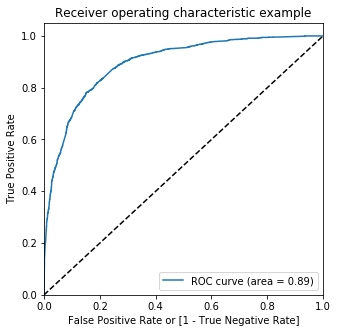

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.725493,4420,1,1,1,1,1,1,1,1,1,0,0
1,0,0.177215,284,0,1,1,0,0,0,0,0,0,0,0
2,0,0.086031,2310,0,1,0,0,0,0,0,0,0,0,0
3,0,0.025702,8311,0,1,0,0,0,0,0,0,0,0,0
4,0,0.102078,417,0,1,1,0,0,0,0,0,0,0,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376160  1.000000  0.000000
0.1   0.1  0.631005  0.971429  0.425737
0.2   0.2  0.771373  0.915152  0.684678
0.3   0.3  0.798893  0.871861  0.754894
0.4   0.4  0.822504  0.775758  0.850692
0.5   0.5  0.823807  0.711688  0.891412
0.6   0.6  0.814362  0.640693  0.919081
0.7   0.7  0.791565  0.530736  0.948838
0.8   0.8  0.772838  0.443290  0.971548
0.9   0.9  0.726755  0.292641  0.988515


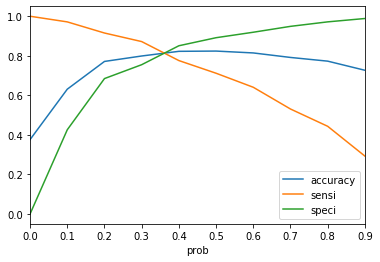

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities
#Zero in at the cutoff probability of 0.34 for 80% sensitivity and specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [132]:
Model.sort_values(ascending=False) ##Final Model with coefficients

Lead Origin_Lead Add Form                                2.7009
What is your current occupation_Working Professional     2.4682
Last Notable Activity_Unreachable                        2.1749
Country_unknown                                          1.5034
Last Activity_SMS Sent                                   1.3710
Last Notable Activity_Unsubscribed                       1.3574
Total Time Spent on Website                              1.1853
const                                                   -0.3890
Specialization_Other                                    -0.9059
Lead Origin_Landing Page Submission                     -0.9795
What matters most to you in choosing a course_Unknown   -1.1437
Last Activity_Olark Chat Conversation                   -1.4617
Do Not Email                                            -1.4809
Name: coef, dtype: float64

In [133]:
print(classification_report(y_test_pred_final.Converted,y_test_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1652
           1       0.71      0.80      0.75       981

    accuracy                           0.81      2633
   macro avg       0.79      0.80      0.80      2633
weighted avg       0.81      0.81      0.81      2633

